In [21]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


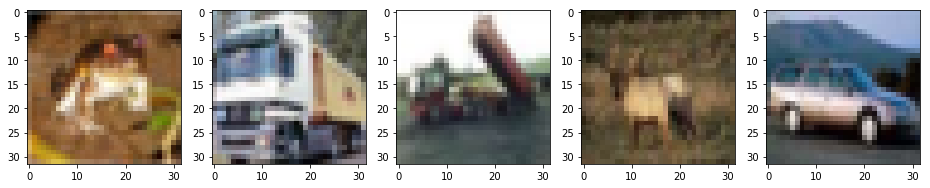

In [24]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [25]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train, epochs=15, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
8s - loss: 1.4364 - acc: 0.4894 - val_loss: 1.4808 - val_acc: 0.4777
Epoch 2/15
9s - loss: 1.4006 - acc: 0.5010 - val_loss: 1.5004 - val_acc: 0.4744
Epoch 3/15
7s - loss: 1.3773 - acc: 0.5086 - val_loss: 1.4701 - val_acc: 0.4829
Epoch 4/15
8s - loss: 1.3571 - acc: 0.5158 - val_loss: 1.4740 - val_acc: 0.4783
Epoch 5/15
7s - loss: 1.3389 - acc: 0.5200 - val_loss: 1.4597 - val_acc: 0.4838
Epoch 6/15
8s - loss: 1.3186 - acc: 0.5306 - val_loss: 1.4407 - val_acc: 0.4944
Epoch 7/15
8s - loss: 1.2998 - acc: 0.5342 - val_loss: 1.4561 - val_acc: 0.4907
Epoch 8/15
8s - loss: 1.2830 - acc: 0.5427 - val_loss: 1.4415 - val_acc: 0.4916
Epoch 9/15
8s - loss: 1.2676 - acc: 0.5458 - val_loss: 1.4396 - val_acc: 0.4986
Epoch 10/15
8s - loss: 1.2480 - acc: 0.5545 - val_loss: 1.4389 - val_acc: 0.4962
Epoch 11/15
8s - loss: 1.2332 - acc: 0.5608 - val_loss: 1.4122 - val_acc: 0.5059
Epoch 12/15
8s - loss: 1.2155 - acc: 0.5660 - val_loss: 1.4329 - val

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 1.8359 - acc: 0.3366 - val_loss: 1.7399 - val_acc: 0.3789
Epoch 2/10
9s - loss: 1.6405 - acc: 0.4139 - val_loss: 1.6602 - val_acc: 0.4123
Epoch 3/10
8s - loss: 1.5609 - acc: 0.4417 - val_loss: 1.6058 - val_acc: 0.4198
Epoch 4/10
9s - loss: 1.5061 - acc: 0.4605 - val_loss: 1.5225 - val_acc: 0.4615
Epoch 5/10
9s - loss: 1.4544 - acc: 0.4806 - val_loss: 1.5185 - val_acc: 0.4631
Epoch 6/10
9s - loss: 1.4163 - acc: 0.4944 - val_loss: 1.4958 - val_acc: 0.4784
Epoch 7/10
9s - loss: 1.3806 - acc: 0.5043 - val_loss: 1.5461 - val_acc: 0.4509
Epoch 8/10
9s - loss: 1.3517 - acc: 0.5153 - val_loss: 1.5135 - val_acc: 0.4616
Epoch 9/10
9s - loss: 1.3240 - acc: 0.5259 - val_loss: 1.4446 - val_acc: 0.4957
Epoch 10/10
10s - loss: 1.2896 - acc: 0.5399 - val_loss: 1.4258 - val_acc: 0.4996


In [31]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)


In [32]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4023698236465454, 0.50739999999999996]


Changing the Number Of Epochs

1. Decreasing the Number of Epochs

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train, epochs=5, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
10s - loss: 1.8239 - acc: 0.3433 - val_loss: 1.7559 - val_acc: 0.3691
Epoch 2/5
9s - loss: 1.6434 - acc: 0.4108 - val_loss: 1.6306 - val_acc: 0.4270
Epoch 3/5
9s - loss: 1.5536 - acc: 0.4455 - val_loss: 1.5913 - val_acc: 0.4305
Epoch 4/5
9s - loss: 1.4945 - acc: 0.4640 - val_loss: 1.5521 - val_acc: 0.4471
Epoch 5/5
9s - loss: 1.4494 - acc: 0.4798 - val_loss: 1.4954 - val_acc: 0.4739


In [48]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [49]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.466035038948059, 0.47410000000000002]


1. Increasing the Number of Epochs

In [50]:
history = model.fit(X_train,y_train, epochs=20, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: 1.4119 - acc: 0.4937 - val_loss: 1.4900 - val_acc: 0.4720
Epoch 2/20
10s - loss: 1.3755 - acc: 0.5067 - val_loss: 1.5018 - val_acc: 0.4747
Epoch 3/20
9s - loss: 1.3417 - acc: 0.5198 - val_loss: 1.4730 - val_acc: 0.4780
Epoch 4/20
8s - loss: 1.3113 - acc: 0.5310 - val_loss: 1.4671 - val_acc: 0.4873
Epoch 5/20
9s - loss: 1.2825 - acc: 0.5406 - val_loss: 1.4959 - val_acc: 0.4775
Epoch 6/20
8s - loss: 1.2525 - acc: 0.5520 - val_loss: 1.4333 - val_acc: 0.4982
Epoch 7/20
9s - loss: 1.2288 - acc: 0.5581 - val_loss: 1.4791 - val_acc: 0.4862
Epoch 8/20
9s - loss: 1.2028 - acc: 0.5682 - val_loss: 1.4615 - val_acc: 0.4956
Epoch 9/20
9s - loss: 1.1732 - acc: 0.5791 - val_loss: 1.4560 - val_acc: 0.5011
Epoch 10/20
9s - loss: 1.1484 - acc: 0.5873 - val_loss: 1.4606 - val_acc: 0.4949
Epoch 11/20
8s - loss: 1.1252 - acc: 0.5962 - val_loss: 1.4673 - val_acc: 0.5064
Epoch 12/20
9s - loss: 1.1056 - acc: 0.6029 - val_loss: 1.4892 - va

In [53]:
score = model.evaluate(X_test, y_test, batch_size=100, verbose=2)

In [54]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.580778101682663, 0.49359999626874923]


Changing Batch Size

Decreasing the Batch Size

In [55]:
history = model.fit(X_train,y_train, epochs=10, batch_size=60, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
12s - loss: 1.1562 - acc: 0.5842 - val_loss: 1.6016 - val_acc: 0.4795
Epoch 2/10
12s - loss: 1.1244 - acc: 0.5949 - val_loss: 1.7054 - val_acc: 0.4674
Epoch 3/10
11s - loss: 1.1145 - acc: 0.5977 - val_loss: 1.6851 - val_acc: 0.4678
Epoch 4/10
12s - loss: 1.0803 - acc: 0.6107 - val_loss: 1.5762 - val_acc: 0.4889
Epoch 5/10
12s - loss: 1.0587 - acc: 0.6207 - val_loss: 1.6326 - val_acc: 0.4758
Epoch 6/10
13s - loss: 1.0363 - acc: 0.6287 - val_loss: 1.5872 - val_acc: 0.4859
Epoch 7/10
12s - loss: 1.0277 - acc: 0.6318 - val_loss: 1.6636 - val_acc: 0.4793
Epoch 8/10
12s - loss: 1.0095 - acc: 0.6354 - val_loss: 1.6608 - val_acc: 0.4849
Epoch 9/10
12s - loss: 0.9998 - acc: 0.6418 - val_loss: 1.6935 - val_acc: 0.4798
Epoch 10/10
11s - loss: 0.9865 - acc: 0.6446 - val_loss: 1.8618 - val_acc: 0.4584


In [56]:
score = model.evaluate(X_test, y_test, batch_size=60, verbose=2)

In [57]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.8036502594947814, 0.46559999877214431]


Increasing the Batch Size

In [58]:
history = model.fit(X_train,y_train, epochs=10, batch_size=160, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.6938 - acc: 0.7504 - val_loss: 1.7491 - val_acc: 0.5144
Epoch 2/10
7s - loss: 0.5790 - acc: 0.7908 - val_loss: 1.8910 - val_acc: 0.5172
Epoch 3/10
7s - loss: 0.5296 - acc: 0.8107 - val_loss: 1.9738 - val_acc: 0.5157
Epoch 4/10
7s - loss: 0.4875 - acc: 0.8235 - val_loss: 2.0128 - val_acc: 0.5141
Epoch 5/10
7s - loss: 0.4570 - acc: 0.8363 - val_loss: 2.1089 - val_acc: 0.5070
Epoch 6/10
7s - loss: 0.4318 - acc: 0.8452 - val_loss: 2.1788 - val_acc: 0.5066
Epoch 7/10
7s - loss: 0.3949 - acc: 0.8584 - val_loss: 2.2444 - val_acc: 0.5094
Epoch 8/10
7s - loss: 0.3751 - acc: 0.8659 - val_loss: 2.3385 - val_acc: 0.5059
Epoch 9/10
7s - loss: 0.3592 - acc: 0.8720 - val_loss: 2.4280 - val_acc: 0.5077
Epoch 10/10
7s - loss: 0.3381 - acc: 0.8783 - val_loss: 2.4646 - val_acc: 0.5078


In [59]:
score = model.evaluate(X_test, y_test, batch_size=160, verbose=2)

In [60]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[2.4110390739440919, 0.51260000181198118]


Increasing epchs and batch size both just to test

In [61]:
history = model.fit(X_train,y_train, epochs=15, batch_size=160, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
8s - loss: 0.3159 - acc: 0.8860 - val_loss: 2.5593 - val_acc: 0.5034
Epoch 2/15
11s - loss: 0.3047 - acc: 0.8926 - val_loss: 2.6038 - val_acc: 0.4964
Epoch 3/15
11s - loss: 0.2945 - acc: 0.8946 - val_loss: 2.7150 - val_acc: 0.5032
Epoch 4/15
9s - loss: 0.2738 - acc: 0.9015 - val_loss: 2.8194 - val_acc: 0.5018
Epoch 5/15
7s - loss: 0.2606 - acc: 0.9080 - val_loss: 2.8187 - val_acc: 0.5028
Epoch 6/15
8s - loss: 0.2526 - acc: 0.9111 - val_loss: 2.9204 - val_acc: 0.4969
Epoch 7/15
8s - loss: 0.2685 - acc: 0.9027 - val_loss: 2.9122 - val_acc: 0.5030
Epoch 8/15
7s - loss: 0.2634 - acc: 0.9053 - val_loss: 3.0190 - val_acc: 0.4964
Epoch 9/15
7s - loss: 0.2570 - acc: 0.9075 - val_loss: 3.1096 - val_acc: 0.4892
Epoch 10/15
8s - loss: 0.2551 - acc: 0.9077 - val_loss: 3.1135 - val_acc: 0.4985
Epoch 11/15
8s - loss: 0.2446 - acc: 0.9104 - val_loss: 3.1723 - val_acc: 0.4935
Epoch 12/15
9s - loss: 0.2593 - acc: 0.9065 - val_loss: 3.2181 - v

In [62]:
score = model.evaluate(X_test, y_test, batch_size=160, verbose=2)

In [63]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[3.2566409950256348, 0.48790000081062318]


Network Configuation 

a. Number of neurons in a layer - Decreasing the number of neurons

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 1.8381 - acc: 0.3381 - val_loss: 1.7141 - val_acc: 0.3848
Epoch 2/10
6s - loss: 1.6375 - acc: 0.4187 - val_loss: 1.6338 - val_acc: 0.4269
Epoch 3/10
5s - loss: 1.5565 - acc: 0.4459 - val_loss: 1.5690 - val_acc: 0.4436
Epoch 4/10
6s - loss: 1.4977 - acc: 0.4666 - val_loss: 1.5401 - val_acc: 0.4547
Epoch 5/10
6s - loss: 1.4567 - acc: 0.4809 - val_loss: 1.4924 - val_acc: 0.4704
Epoch 6/10
5s - loss: 1.4204 - acc: 0.4943 - val_loss: 1.4786 - val_acc: 0.4781
Epoch 7/10
5s - loss: 1.3833 - acc: 0.5087 - val_loss: 1.4862 - val_acc: 0.4749
Epoch 8/10
5s - loss: 1.3616 - acc: 0.5146 - val_loss: 1.4892 - val_acc: 0.4736
Epoch 9/10
5s - loss: 1.3335 - acc: 0.5245 - val_loss: 1.4672 - val_acc: 0.4862
Epoch 10/10
5s - loss: 1.3061 - acc: 0.5355 - val_loss: 1.4176 - val_acc: 0.4994


In [66]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [67]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.3954704895019532, 0.50560000000000005]


Network Configuation 

a. Number of neurons in a layer - Increasing the number of neurons

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(350, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])





In [69]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 1.8295 - acc: 0.3443 - val_loss: 1.7242 - val_acc: 0.3790
Epoch 2/10
8s - loss: 1.6311 - acc: 0.4169 - val_loss: 1.6008 - val_acc: 0.4349
Epoch 3/10
8s - loss: 1.5473 - acc: 0.4493 - val_loss: 1.5543 - val_acc: 0.4465
Epoch 4/10
10s - loss: 1.4814 - acc: 0.4738 - val_loss: 1.5332 - val_acc: 0.4587
Epoch 5/10
9s - loss: 1.4378 - acc: 0.4885 - val_loss: 1.4737 - val_acc: 0.4832
Epoch 6/10
9s - loss: 1.3971 - acc: 0.5035 - val_loss: 1.4641 - val_acc: 0.4873
Epoch 7/10
9s - loss: 1.3565 - acc: 0.5175 - val_loss: 1.4532 - val_acc: 0.4977
Epoch 8/10
8s - loss: 1.3284 - acc: 0.5257 - val_loss: 1.4165 - val_acc: 0.5039
Epoch 9/10
9s - loss: 1.2970 - acc: 0.5374 - val_loss: 1.4226 - val_acc: 0.4969
Epoch 10/10
8s - loss: 1.2635 - acc: 0.5499 - val_loss: 1.4012 - val_acc: 0.5089


In [71]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [72]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.3866081304550171, 0.50890000000000002]


b. Decreasing Number of Layers

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])





In [74]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 1.8168 - acc: 0.3564 - val_loss: 1.7223 - val_acc: 0.3954
Epoch 2/10
8s - loss: 1.6363 - acc: 0.4222 - val_loss: 1.6643 - val_acc: 0.4216
Epoch 3/10
8s - loss: 1.5646 - acc: 0.4471 - val_loss: 1.6255 - val_acc: 0.4256
Epoch 4/10
8s - loss: 1.5151 - acc: 0.4656 - val_loss: 1.5649 - val_acc: 0.4529
Epoch 5/10
8s - loss: 1.4767 - acc: 0.4795 - val_loss: 1.5167 - val_acc: 0.4667
Epoch 6/10
8s - loss: 1.4436 - acc: 0.4901 - val_loss: 1.5346 - val_acc: 0.4590
Epoch 7/10
8s - loss: 1.4128 - acc: 0.5024 - val_loss: 1.5218 - val_acc: 0.4592
Epoch 8/10
8s - loss: 1.3856 - acc: 0.5113 - val_loss: 1.5083 - val_acc: 0.4724
Epoch 9/10
8s - loss: 1.3623 - acc: 0.5220 - val_loss: 1.4772 - val_acc: 0.4755
Epoch 10/10
8s - loss: 1.3406 - acc: 0.5251 - val_loss: 1.4747 - val_acc: 0.4784


In [75]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [76]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4494222885131836, 0.4874]


Increasing Number of Layers

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 1.8316 - acc: 0.3386 - val_loss: 1.6950 - val_acc: 0.3961
Epoch 2/10
10s - loss: 1.6298 - acc: 0.4205 - val_loss: 1.6117 - val_acc: 0.4294
Epoch 3/10
9s - loss: 1.5411 - acc: 0.4501 - val_loss: 1.5669 - val_acc: 0.4456
Epoch 4/10
9s - loss: 1.4834 - acc: 0.4704 - val_loss: 1.5115 - val_acc: 0.4665
Epoch 5/10
9s - loss: 1.4343 - acc: 0.4905 - val_loss: 1.5095 - val_acc: 0.4706
Epoch 6/10
9s - loss: 1.3947 - acc: 0.5048 - val_loss: 1.4652 - val_acc: 0.4905
Epoch 7/10
9s - loss: 1.3574 - acc: 0.5162 - val_loss: 1.4571 - val_acc: 0.4899
Epoch 8/10
10s - loss: 1.3209 - acc: 0.5293 - val_loss: 1.4494 - val_acc: 0.4951
Epoch 9/10
9s - loss: 1.2917 - acc: 0.5379 - val_loss: 1.4196 - val_acc: 0.5055
Epoch 10/10
10s - loss: 1.2579 - acc: 0.5530 - val_loss: 1.4453 - val_acc: 0.4963


In [79]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [80]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4105119270324706, 0.50139999999999996]


Changing Learning Rate - 

Decreasing it

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [82]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 2.0089 - acc: 0.2860 - val_loss: 1.8964 - val_acc: 0.3362
Epoch 2/10
9s - loss: 1.8268 - acc: 0.3625 - val_loss: 1.8098 - val_acc: 0.3557
Epoch 3/10
9s - loss: 1.7534 - acc: 0.3865 - val_loss: 1.7696 - val_acc: 0.3750
Epoch 4/10
9s - loss: 1.7022 - acc: 0.4059 - val_loss: 1.7231 - val_acc: 0.3907
Epoch 5/10
9s - loss: 1.6598 - acc: 0.4229 - val_loss: 1.6880 - val_acc: 0.4073
Epoch 6/10
8s - loss: 1.6236 - acc: 0.4350 - val_loss: 1.6566 - val_acc: 0.4235
Epoch 7/10
9s - loss: 1.5936 - acc: 0.4436 - val_loss: 1.6373 - val_acc: 0.4295
Epoch 8/10
9s - loss: 1.5657 - acc: 0.4537 - val_loss: 1.6113 - val_acc: 0.4313
Epoch 9/10
11s - loss: 1.5430 - acc: 0.4616 - val_loss: 1.5951 - val_acc: 0.4410
Epoch 10/10
9s - loss: 1.5207 - acc: 0.4685 - val_loss: 1.5764 - val_acc: 0.4481


In [83]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [84]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.5425354846954347, 0.45760000000000001]


Changing Learning Rate - 

Increasing it

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [86]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
10s - loss: 1.8959 - acc: 0.3087 - val_loss: 1.7641 - val_acc: 0.3601
Epoch 2/10
9s - loss: 1.7308 - acc: 0.3762 - val_loss: 1.6895 - val_acc: 0.3953
Epoch 3/10
9s - loss: 1.6793 - acc: 0.3965 - val_loss: 1.6641 - val_acc: 0.4098
Epoch 4/10
8s - loss: 1.6492 - acc: 0.4090 - val_loss: 1.6812 - val_acc: 0.4069
Epoch 5/10
8s - loss: 1.6240 - acc: 0.4207 - val_loss: 1.6604 - val_acc: 0.4037
Epoch 6/10
10s - loss: 1.6053 - acc: 0.4275 - val_loss: 1.6354 - val_acc: 0.4237
Epoch 7/10
9s - loss: 1.5928 - acc: 0.4308 - val_loss: 1.6532 - val_acc: 0.4190
Epoch 8/10
9s - loss: 1.5856 - acc: 0.4354 - val_loss: 1.6420 - val_acc: 0.4253
Epoch 9/10
8s - loss: 1.5692 - acc: 0.4391 - val_loss: 1.6051 - val_acc: 0.4314
Epoch 10/10
8s - loss: 1.5578 - acc: 0.4418 - val_loss: 1.6478 - val_acc: 0.4132


In [87]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [88]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.6207207927703857, 0.42280000000000001]


Changing Activation Function

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='sigmoid', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [90]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
11s - loss: 1.9583 - acc: 0.2986 - val_loss: 1.8463 - val_acc: 0.3395
Epoch 2/10
9s - loss: 1.7721 - acc: 0.3722 - val_loss: 1.7676 - val_acc: 0.3750
Epoch 3/10
8s - loss: 1.6909 - acc: 0.4018 - val_loss: 1.7084 - val_acc: 0.3935
Epoch 4/10
8s - loss: 1.6325 - acc: 0.4221 - val_loss: 1.6475 - val_acc: 0.4232
Epoch 5/10
9s - loss: 1.5856 - acc: 0.4370 - val_loss: 1.6098 - val_acc: 0.4335
Epoch 6/10
9s - loss: 1.5521 - acc: 0.4485 - val_loss: 1.5822 - val_acc: 0.4439
Epoch 7/10
9s - loss: 1.5188 - acc: 0.4623 - val_loss: 1.5554 - val_acc: 0.4505
Epoch 8/10
9s - loss: 1.4880 - acc: 0.4720 - val_loss: 1.5377 - val_acc: 0.4577
Epoch 9/10
10s - loss: 1.4616 - acc: 0.4840 - val_loss: 1.5045 - val_acc: 0.4687
Epoch 10/10
9s - loss: 1.4356 - acc: 0.4897 - val_loss: 1.4996 - val_acc: 0.4714


In [91]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [92]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4703817983627319, 0.47649999999999998]


Changing Activation function

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [94]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
10s - loss: 1.9530 - acc: 0.3023 - val_loss: 1.8099 - val_acc: 0.3677
Epoch 2/10
9s - loss: 1.7360 - acc: 0.3855 - val_loss: 1.6959 - val_acc: 0.3971
Epoch 3/10
10s - loss: 1.6307 - acc: 0.4224 - val_loss: 1.6076 - val_acc: 0.4330
Epoch 4/10
9s - loss: 1.5628 - acc: 0.4456 - val_loss: 1.6165 - val_acc: 0.4259
Epoch 5/10
9s - loss: 1.5130 - acc: 0.4623 - val_loss: 1.5709 - val_acc: 0.4442
Epoch 6/10
8s - loss: 1.4756 - acc: 0.4744 - val_loss: 1.5236 - val_acc: 0.4556
Epoch 7/10
10s - loss: 1.4360 - acc: 0.4897 - val_loss: 1.5169 - val_acc: 0.4563
Epoch 8/10
9s - loss: 1.4072 - acc: 0.5001 - val_loss: 1.4783 - val_acc: 0.4746
Epoch 9/10
9s - loss: 1.3791 - acc: 0.5102 - val_loss: 1.4655 - val_acc: 0.4819
Epoch 10/10
8s - loss: 1.3510 - acc: 0.5203 - val_loss: 1.4395 - val_acc: 0.4862


In [95]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [96]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4225452732086181, 0.49359999999999998]


Adding Dropout rates

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [98]:
history = model.fit(X_train,y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
11s - loss: 1.9281 - acc: 0.2970 - val_loss: 1.8317 - val_acc: 0.3449
Epoch 2/10
10s - loss: 1.7662 - acc: 0.3686 - val_loss: 1.6951 - val_acc: 0.3926
Epoch 3/10
10s - loss: 1.7056 - acc: 0.3893 - val_loss: 1.6324 - val_acc: 0.4227
Epoch 4/10
10s - loss: 1.6577 - acc: 0.4098 - val_loss: 1.6140 - val_acc: 0.4272
Epoch 5/10
9s - loss: 1.6220 - acc: 0.4200 - val_loss: 1.5606 - val_acc: 0.4498
Epoch 6/10
9s - loss: 1.5870 - acc: 0.4337 - val_loss: 1.5549 - val_acc: 0.4452
Epoch 7/10
9s - loss: 1.5680 - acc: 0.4373 - val_loss: 1.5499 - val_acc: 0.4565
Epoch 8/10
9s - loss: 1.5472 - acc: 0.4462 - val_loss: 1.5206 - val_acc: 0.4560
Epoch 9/10
8s - loss: 1.5266 - acc: 0.4517 - val_loss: 1.5068 - val_acc: 0.4625
Epoch 10/10
9s - loss: 1.5122 - acc: 0.4585 - val_loss: 1.4778 - val_acc: 0.4797


In [99]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)



In [100]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4578220039367675, 0.48659999999999998]
